In [1]:
#load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sklearn.metrics

In [2]:
datasets = pd.read_csv('Patient_Cancer_SVM.csv', index_col=0, header=0)
#datasets = pd.read_csv('DemoExample_GeneExpression_SVM.csv', index_col=0, header=0)

In [3]:
datasets

,Gender,Age,Marker Gene Level,Diagnosed
User ID,,,,
1,Male,19,0.19,0
2,Male,35,0.20,0
3,Female,26,0.43,0
4,Female,27,0.57,0
5,Male,19,0.76,0
...,...,...,...,...
396,Female,46,0.41,1
397,Male,51,0.23,1
398,Female,50,0.20,1


In [4]:
X = datasets.iloc[:, [1,2]].values
Y = datasets.iloc[:, 3].values
#X = datasets.iloc[:, 1:77].values ##[2,6] for Arc and Bdnf
#Y = datasets.iloc[:, 78].values

In [5]:
X

array([[19.  ,  0.19],
       [35.  ,  0.2 ],
       [26.  ,  0.43],
       [27.  ,  0.57],
       [19.  ,  0.76],
       [27.  ,  0.58],
       [27.  ,  0.84],
       [32.  ,  1.5 ],
       [25.  ,  0.33],
       [35.  ,  0.65],
       [26.  ,  0.8 ],
       [26.  ,  0.52],
       [20.  ,  0.86],
       [32.  ,  0.18],
       [18.  ,  0.82],
       [29.  ,  0.8 ],
       [47.  ,  0.25],
       [45.  ,  0.26],
       [46.  ,  0.28],
       [48.  ,  0.29],
       [45.  ,  0.22],
       [47.  ,  0.49],
       [48.  ,  0.41],
       [45.  ,  0.22],
       [46.  ,  0.23],
       [47.  ,  0.2 ],
       [49.  ,  0.28],
       [47.  ,  0.3 ],
       [29.  ,  0.43],
       [31.  ,  0.18],
       [31.  ,  0.74],
       [27.  ,  1.37],
       [21.  ,  0.16],
       [28.  ,  0.44],
       [27.  ,  0.9 ],
       [35.  ,  0.27],
       [33.  ,  0.28],
       [30.  ,  0.49],
       [26.  ,  0.72],
       [27.  ,  0.31],
       [27.  ,  0.17],
       [33.  ,  0.51],
       [35.  ,  1.08],
       [30.

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [7]:
#Split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

In [8]:
X_Train

array([[28.  ,  0.59],
       [40.  ,  0.57],
       [59.  ,  1.43],
       [57.  ,  0.26],
       [52.  ,  0.38],
       [47.  ,  1.13],
       [53.  ,  1.43],
       [35.  ,  0.27],
       [58.  ,  1.01],
       [45.  ,  0.45],
       [23.  ,  0.82],
       [46.  ,  0.23],
       [42.  ,  0.65],
       [28.  ,  0.84],
       [38.  ,  0.59],
       [26.  ,  0.84],
       [29.  ,  0.28],
       [37.  ,  0.71],
       [22.  ,  0.55],
       [48.  ,  0.35],
       [49.  ,  0.28],
       [38.  ,  0.65],
       [27.  ,  0.17],
       [46.  ,  0.28],
       [48.  ,  1.41],
       [26.  ,  0.17],
       [35.  ,  0.97],
       [39.  ,  0.59],
       [24.  ,  0.27],
       [32.  ,  0.18],
       [46.  ,  0.88],
       [35.  ,  0.58],
       [56.  ,  0.6 ],
       [47.  ,  0.34],
       [40.  ,  0.72],
       [32.  ,  1.  ],
       [19.  ,  0.21],
       [25.  ,  0.9 ],
       [35.  ,  0.88],
       [28.  ,  0.32],
       [50.  ,  0.2 ],
       [40.  ,  0.59],
       [50.  ,  0.44],
       [35.

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test  = sc_X.fit_transform(X_Test)

In [10]:
X_Test

array([[-7.06181706e-01,  4.12346965e-01],
       [ 4.40777426e-02, -6.79376663e-01],
       [-2.37269551e-01,  5.82744369e-02],
       [-7.06181706e-01,  1.76298613e-01],
       [-2.37269551e-01, -6.79376663e-01],
       [-9.87528999e-01, -1.56455798e+00],
       [-6.12399275e-01, -1.71208820e+00],
       [-1.43487120e-01,  2.09419147e+00],
       [-1.83157088e+00, -1.48267871e-01],
       [ 8.88119622e-01, -8.85918971e-01],
       [-7.06181706e-01, -7.08882707e-01],
       [-8.93746568e-01, -5.31846443e-01],
       [-4.97046885e-02, -5.31846443e-01],
       [ 1.37860174e-01,  1.17286525e-01],
       [-1.64400602e+00,  3.82840921e-01],
       [-5.18616844e-01,  1.29752829e+00],
       [-4.97046885e-02,  1.17286525e-01],
       [-1.73778845e+00,  3.53334877e-01],
       [ 1.63837907e+00,  1.68110686e+00],
       [-2.37269551e-01, -1.50554590e+00],
       [-2.37269551e-01, -7.67894795e-01],
       [ 8.88119622e-01,  2.09419147e+00],
       [ 3.25425036e-01, -6.49870619e-01],
       [ 8.

In [11]:
# Fit the model with RBF kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0) ## rbf: Radial Basis Function
#classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(random_state=0)

In [12]:
Y_Pred = classifier.predict(X_Test)
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(Y_Test, Y_Pred)
cm_test

array([[112,  11],
       [ 13,  64]], dtype=int64)

In [14]:
#checking performance 
import sklearn.metrics
import math
def matrix_metrix(Y_Test, Y_Pred,beta):
   CM = confusion_matrix(Y_Test, Y_Pred)
   TN = CM[0][0]
   FN = CM[1][0] 
   TP = CM[1][1]
   FP = CM[0][1]
   ACC        = (TP+TN) / (TN+FN+TP+FP)
   PPV        =  TP / (TP+FP)
   NPV        =  TN / (TN+FN)
   FDR        =  FP / (TP+FP)
   FOR        =  FN / (TN+FN)
   TPR        =  TP / (TP+FN)
   FPR        =  FP / (TN+FP)
   FNR        =  FN / (TP+FN)
   TNR        =  TN / (TN+FP)
   F1score    =  2 * ((PPV*TPR)/(PPV+TPR))
   MCC        =  ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  
   BM         =  TPR+TNR-1
   MK         =  PPV+NPV-1 
   BA         =  (TPR+TNR)/2
   TS         =  TP / (TP+FN+FP) 
   FM         =  math.sqrt(TP / (TP+FP))*(TP /(TP+FN))
   PT         =  math.sqrt(FPR) / (math.sqrt(TPR)+ math.sqrt(FPR))
  
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','ACC','PPV','NPV','FDR','FOR','TPR','FPR','FNR','TNR','F1score','MCC','BM','MK','BA','TS','FM','PT'],     'Value':[TP,TN,FP,FN,ACC,PPV,NPV,FDR,FOR,TPR,FPR,FNR,TNR,F1score,MCC,BM,MK,BA,TS,FM,PT]})
   return (mat_met)

beta = 0.4
mat_met = matrix_metrix(Y_Test, Y_Pred,beta)
print (mat_met)

     Metric       Value
0        TP   64.000000
1        TN  112.000000
2        FP   11.000000
3        FN   13.000000
4       ACC    0.880000
5       PPV    0.853333
6       NPV    0.896000
7       FDR    0.146667
8       FOR    0.104000
9       TPR    0.831169
10      FPR    0.089431
11      FNR    0.168831
12      TNR    0.910569
13  F1score    0.842105
14      MCC    0.745526
15       BM    0.741738
16       MK    0.749333
17       BA    0.870869
18       TS    0.727273
19       FM    0.767801
20       PT    0.246999


In [15]:
from sklearn.metrics import recall_score
test_recall = recall_score(Y_Test, Y_Pred)
test_recall

0.8311688311688312

In [16]:
from sklearn.metrics import precision_score
test_p = precision_score(Y_Test, Y_Pred)
test_p

0.8533333333333334

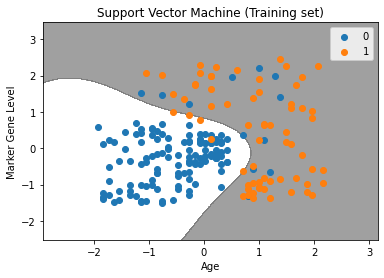

In [17]:
#Plotting the classification results for training sets
from matplotlib.colors import ListedColormap
plot1=plt.figure(1)
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                cmap = ListedColormap(('blue', 'purple'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Marker Gene Level')
plt.legend()

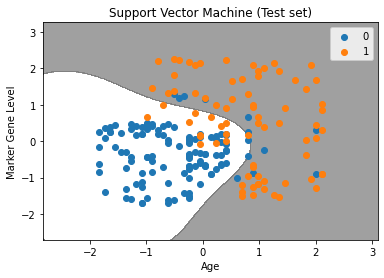

In [18]:
#Plotting the classification results for testing sets 
plot2=plt.figure(2)
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'gray')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                cmap = ListedColormap(('blue', 'purple'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Marker Gene Level')
plt.legend()
plt.show()